# Visualize Stock Trends With Intervals

In [1]:
import os
import sys
from pathlib import Path

# Define BASE_DIR and adjust sys.path before importing
BASE_DIR = Path(os.getcwd()).parent  # Points to stat_656_autotrader/ from Notebooks/
sys.path.append(str(BASE_DIR))
print(f"Project root added to sys.path: {BASE_DIR}")

from src.visualizations.stock_price_trends import plot_stock_trends_with_intervals

Project root added to sys.path: d:\dev\stat_656_autotrader


## Stock Price Trends Visualization Tool

This visualization provides an intuitive yet rigorous analysis of stock price behavior, smoothing out short-term fluctuations, clearly displaying underlying price trends, and quantifying uncertainty. Such visual insights can help in making informed trading decisions, understanding historical price behaviors, and identifying periods of significant structural changes in the stock price.

Connecting to database: D:\dev\stat_656_autotrader\databases\assets.db
Querying MCD prices for last 90 trading days from 2024-12-04 to 2025-04-15
Fetched 90 price records for MCD


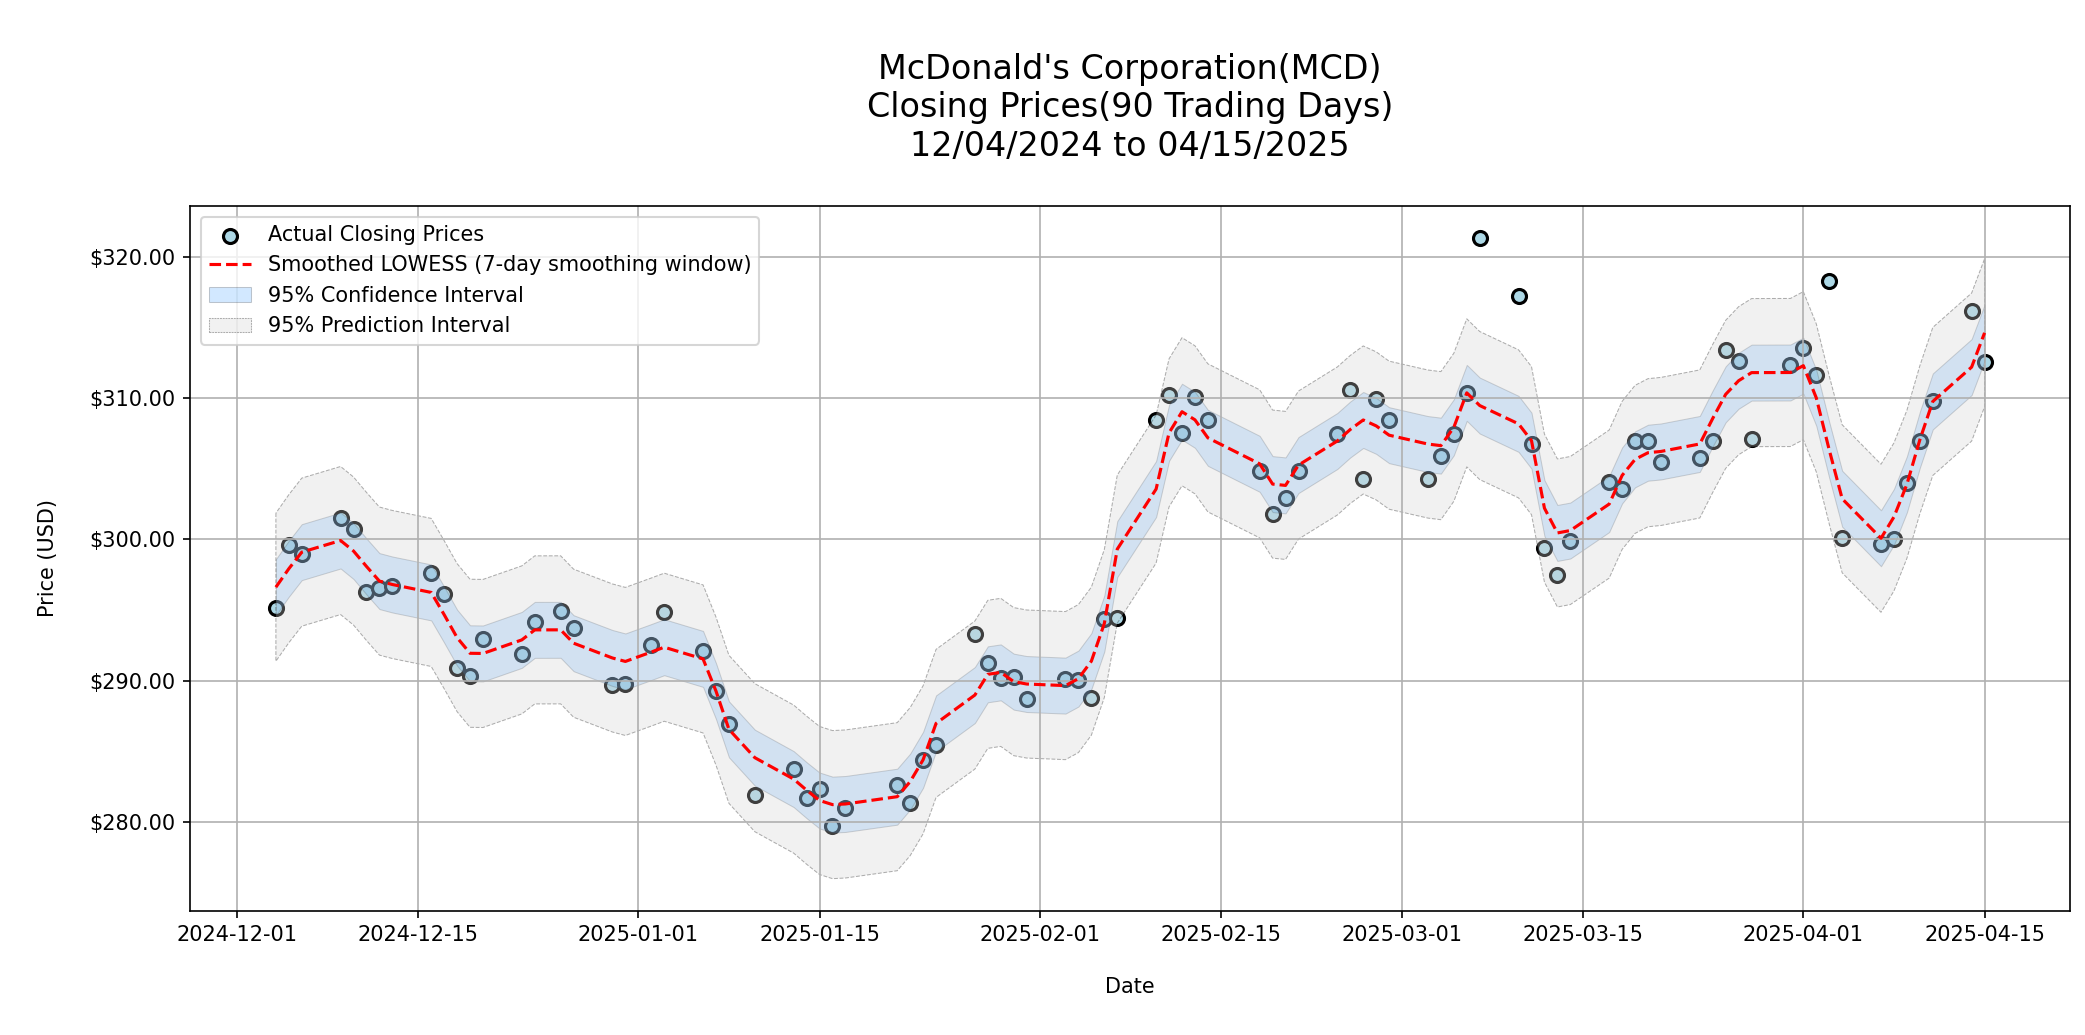

In [ ]:
plot_stock_trends_with_intervals(
    symbol='MCD',                   # Stock ticker symbol (e.g., McDonald's Corporation)
    days_back=90,                   # Number of historical days to retrieve (90 trading days)
    smoothing_window=7,             # Window size (days) for smoothing prices (7-day smoothing window)
    smoother="lowess",              # Smoothing method: 'lowess', 'exponential', or 'sma' (Simple Moving Average)
    price_type="close",             # Type of price data ('open', 'high', 'low', 'close')
    show_actual_line=False,         # Whether to draw a connecting line between actual price points
    show_grid=True,                 # Display grid lines on the plot
    show_legend=True,               # Display legend on the plot
    calendar_days=False,            # False means 'days_back' refers to trading days; True for calendar days
    ci=95,                          # Confidence interval percentage (95% confidence interval)
    level_shifts_model=None,        # Model for detecting level shifts ('l2', 'l1', 'rbf', 'linear', 'normal', or None)
    level_shifts_penalty=5,         # Penalty influencing number of shifts detected (higher value = fewer shifts)
    level_shifts_min_size=5         # Minimum observations between detected shifts
)


## Detailed Explanation of the Stock Price Trend Visualization

The visualization generated by the function `plot_stock_trends_with_intervals` provides insight into historical stock price behavior through advanced statistical smoothing and uncertainty estimation. The following describes in detail what this visualization entails:

### Data Source and Stock Selection
- **Symbol (`symbol`)**: Represents the specific stock ticker symbol to visualize. In this example, `MCD` denotes McDonald's Corporation.

### Historical Data Window
- **Days Back (`days_back`)**: Determines how many historical days (either calendar or trading) of stock data will be retrieved for the analysis.  
  - **`calendar_days=False`**: This means the function will consider only actual trading days, ignoring weekends and market holidays.
  - **Example**: `days_back=90` means the last 90 trading days of data are analyzed.

### Smoothing the Price Data
- **Smoothing Method (`smoother`)**: Techniques applied to the noisy stock price data to highlight underlying trends and patterns:
  - **LOWESS (`lowess`)**: A robust, locally weighted regression smoother that provides a smooth curve following the general price trend, less sensitive to short-term volatility.
  - **Exponential (`exponential`)**: Applies exponential weighting to recent observations to produce a smoothed line, emphasizing recent prices.
  - **Simple Moving Average (`sma`)**: Computes an average price over a specified window length to smooth short-term fluctuations.
- **Smoothing Window (`smoothing_window`)**: The number of observations (days) used to compute each point in the smoothed line. Smaller windows follow prices more closely, whereas larger windows produce smoother, less volatile curves.
  - **Example**: A 7-day window computes each smoothed point based on the previous 7 days of prices.

### Type of Price Displayed
- **Price Type (`price_type`)**: Specifies which type of price (Open, High, Low, Close) is being analyzed:
  - **`close`**: The closing price for each trading day, commonly used for analysis due to its importance in daily valuations.

### Visualization Options
- **Actual Price Line (`show_actual_line`)**:  
  - **`False`**: Displays individual data points as scatter points without connecting them with a continuous line, which can help visualize data density without implying continuity.
- **Grid Display (`show_grid`)**:  
  - **`True`**: Includes gridlines in the plot, improving readability.
- **Legend Display (`show_legend`)**:  
  - **`True`**: Provides a legend explaining each graphical element, helping interpret the plot.

### Statistical Confidence and Prediction Intervals
- **Confidence Interval (`ci`)**: Sets the percentage for confidence and prediction intervals:
  - **95% confidence interval** means there's a 95% probability that the true trend line lies within the darker band (confidence interval).
  - **Prediction interval** (lighter shaded band) indicates a 95% probability that future individual observations will fall within this broader range, reflecting expected daily volatility around the smoothed trend.

### Level Shift (Change Point) Detection
- **Level Shifts Model (`level_shifts_model`)**: Optionally uses the `ruptures` library to detect structural breaks or shifts in the stock price trend, indicating significant changes in the mean price level.
  - **Model Options**: `'l2'`, `'l1'`, `'rbf'`, `'linear'`, `'normal'`, or `None` (no detection).
- **Penalty (`level_shifts_penalty`)**: Adjusts sensitivity to changes—higher penalty values lead to fewer shifts detected.
- **Minimum Size (`level_shifts_min_size`)**: Defines the smallest allowable distance between detected shifts, helping avoid detection of overly frequent or spurious changes.

